<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
d= np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002


error = abs(d - valor_real)/ valor_real * 100

print(error)
#(12.123452/valor_real)*1/(2**31)



1.9073486e-06
4.632568359374996


In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

Write a program that calculates  e−x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [ ]:
def exponencial(x,N):
  exp=0
  for i in range(N):
    exp += (-1) ** i * (x**i / factorial(i))

  return exp

Calculate your series for  x≤1  and compare it to the built-in function exp(x) (you may assume that the built-in exponential function is exact). You should pick an N for which the next term in the series is no more than  10−7  of the sum up to that point

In [ ]:
x=0.1
N =100
e1 = exponencial(x,N)
print(f"El valor obtenido es {e1}")

El valor obtenido es 0.9048374180359596


In [ ]:
e_exacto = np.exp(-x)
print("El valor obtenido con la funcion incorporada es ",e_exacto)


El valor obtenido con la funcion incorporada es  0.9048374180359595


In [ ]:
print("La diferencia entre el valor obtenido por las dos formas es ", abs(e_exacto - e1))

La diferencia entre el valor obtenido por las dos formas es  1.1102230246251565e-16


In [ ]:
def exponencial_truncado(x,N):
  l=[]
  ex = exponencial(x,N)

  limite = abs(1e-7 * ex)
  exp_= 0

  for i in range(N):
    exp_ = abs((-x) **(i+1) / factorial(i+1))
    l.append(exp_)
    if exp_<= limite:
      break
  exp = exponencial(x,i)
  return exp, i,l

In [ ]:
x=0.1
N = 100

print("el valor de la serie es ", exponencial(x,N))
print("valor de serie truncada es ",exponencial_truncado(x,N)[0])
print("El termino N para el cual el siguiente término de la serie no sea más que 10−7 de la suma hasta ese punto es: " ,exponencial_truncado(x,N)[1])


el valor de la serie es  0.9048374180359596
valor de serie truncada es  0.9048333333333334
El termino N para el cual el siguiente término de la serie no sea más que 10−7 de la suma hasta ese punto es:  4


Examine the terms in the series for  x≈10  and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation at  n≈x−1 .

In [ ]:
# PARA X=10
sub = (exponencial_truncado(10,N)[2])
sub

[10.0,
 50.0,
 166.66666666666666,
 416.6666666666667,
 833.3333333333334,
 1388.888888888889,
 1984.126984126984,
 2480.15873015873,
 2755.731922398589,
 2755.731922398589,
 2505.210838544172,
 2087.67569878681,
 1605.9043836821616,
 1147.0745597729724,
 764.7163731819817,
 477.9477332387385,
 281.14572543455205,
 156.19206968586226,
 82.2063524662433,
 41.10317623312165,
 19.572941063391262,
 8.896791392450574,
 3.868170170630684,
 1.6117375710961184,
 0.6446950284384474,
 0.24795962632247975,
 0.09183689863795547,
 0.03279889237069838,
 0.011309962886447717,
 0.003769987628815906,
 0.001216125041553518,
 0.00038003907548547436,
 0.0001151633562077195,
 3.3871575355211616e-05,
 9.677592958631891e-06,
 2.6882202662866364e-06,
 7.265460179153071e-07,
 1.9119632050402818e-07,
 4.9024697565135436e-08,
 1.2256174391283859e-08,
 2.9893108271424046e-09,
 7.11740673129144e-10,
 1.6552108677421953e-10,
 3.761842881232262e-11,
 8.359650847182803e-12,
 1.817315401561479e-12]

In [ ]:
#OBSERVAMOS QUE EN EN LOS TERMINOS n=X-1 = 10-1=9 y en n=8, LA CANCELACION ES PERFECTA
sub[9],sub[8]
print("su diferencia es ", sub[9]-sub[8])

su diferencia es  0.0


See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff error

In [ ]:

def invertida(x,N):

  exp = 0
  for i in range(N):
    exp  += x** i / factorial(i)  # exponencial es igual a eso

  return 1/exp

In [ ]:
x=10
N = 10

exacto = np.exp(-x)


print("el valor de la serie construida es ", exponencial(x,N))
print("valor de serie invertida  es ",invertida(x,N))
print(" el valor de la serie establecida con una funcion de numpy es ",exacto)

el valor de la serie construida es  -1413.1446208112875
valor de serie invertida  es  9.914169866623816e-05
 el valor de la serie establecida con una funcion de numpy es  4.5399929762484854e-05


En efecto con la serie invertida se logra mas precision ya que se elimina la cancelacion sustractiva, sin embargo persiste el error de redondeo

By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

In [ ]:
#DE 1 A 10
n = 10
N = np.arange(1,n,1)


exp_normal  = np.zeros(len(N))

exp_invertida = np.zeros(len(N))


for i,n in enumerate(N):
  exp_normal[i] =exponencial(x,n)

  exp_invertida[i] = invertida(x,n)

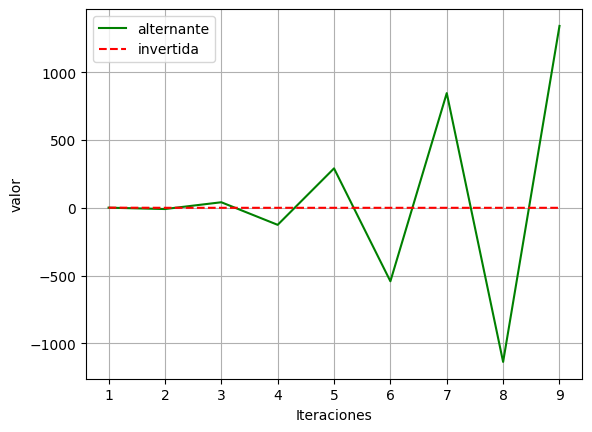

In [ ]:
plt.plot(N,exp_normal,"g-", label = "alternante")
plt.plot(N,exp_invertida,"r--", label = "invertida")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("valor")
plt.grid()
plt.show()

La serie  no invertida(alternante) ya no  converge a partir de la iteración numero 2 (cuando N incrementa de 1 a 10)  ,  mientras que en la funcion invertida si converge a cero desde el inicio. En la serie alternante se pierde precisión a partir de la iteración numero 2 ya que se aleja del valor cero

In [ ]:
#DE 10 A 100
n = 100
N = np.arange(10,n,1)


exp_normal  = np.zeros(len(N))

exp_invertida = np.zeros(len(N))


for i,n in enumerate(N):
  exp_normal[i] =exponencial(x,n)

  exp_invertida[i] = invertida(x,n)

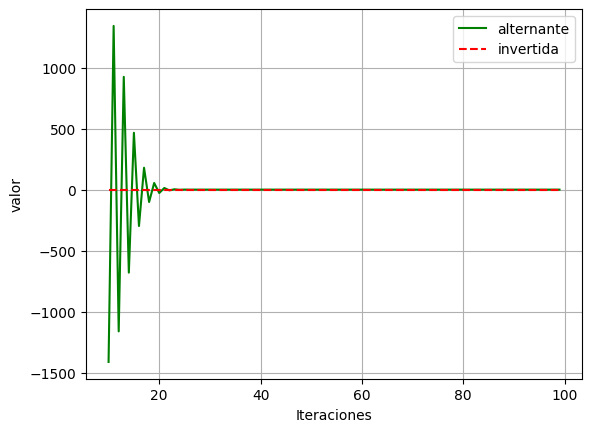

In [ ]:
plt.plot(N,exp_normal,"g-", label = "alternante")
plt.plot(N,exp_invertida,"r--", label = "invertida")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("valor")
plt.grid()
plt.show()

De N=10  a N=100 la serie alterante comienza a converger desde la iteración numero 10, y converge muy cerca al cero en la iteracion numero 20 donde la precisicion comienza a ser mas alta. La serie invertida siempre se mantiene en un valor igual a cero

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




Escribir un programa que realice el cálculo de S(1)N, S(2)N y  y  S(3)N

In [ ]:
def SN1(N):
  s = 0
  N = 2 * N
  for i in range(1,N+1):
    s += (i / (i+1)) * ((-1) ** i)
  return s


SN1(100)

0.30437144514006564

In [ ]:
def SN2(N):
  s_par = 0
  s_impar = 0

  for i in range(1,N+1):
    s_par +=  ((2 * i) - 1)/ (2*i)

  for i in range(1,N+1):
    s_impar += (2*i) / (2*i + 1)

  s= ((-1) * s_par ) + s_impar


  return s

SN2(100)


0.30437144514002057

In [ ]:
def SN3(N):
  s = 0
  for i in range(1,N + 1):
   s +=  1 / ((2 * i) * (2* i +1 ))

  return s

SN3(100)

0.3043714451400664

Estudiar la convergencia de la serie para los tres casos.

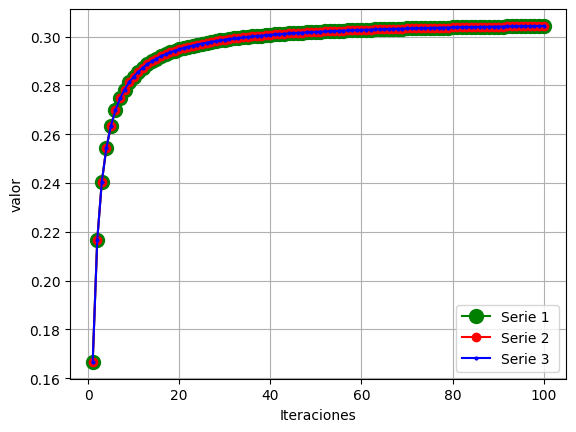

In [ ]:
#PARA LAS 3 SERIES SE HACE UNA GRAFICA
n = 100
N = np.arange(1,n+1,1)


serie1  = np.zeros(len(N))

serie2  = np.zeros(len(N))

serie3  = np.zeros(len(N))


for i,n in enumerate(N):
  serie1[i] = SN1(n)
  serie2[i] = SN2(n)
  serie3[i] = SN3(n)


plt.plot(N,serie1,"go-",markersize = "10", label ="Serie 1 ")
plt.plot(N,serie2,"ro-" , label ="Serie 2 ")
plt.plot(N,serie3,"bo-",markersize = "2" , label ="Serie 3 ")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("valor")
plt.grid()
plt.show();


In [ ]:
print("Para N=",n, "La serie 1 converge en ", SN1(n),",La serie 2 converge en ", SN2(n),", La serie 3 converge en ", SN3(n))

Para N= 100 La serie 1 converge en  0.30437144514006564 ,La serie 2 converge en  0.30437144514002057 , La serie 3 converge en  0.3043714451400664


Considere que  S(3)N  es la solución exacta, realizar dos graficos log-log, del error relativo en función del número de términos ( Log10E  VS

In [ ]:
#PARA LAS 3 SERIES SE HACE UNA GRAFICA
# SE DEMORA UN MINUTO  EN CARGAR YA QUE ES 10**6
n = 10**6
N = np.arange(1,n+1,100000)



E1  = np.zeros(len(N))

E2  = np.zeros(len(N))


for i,n in enumerate(N):
  E1[i] = abs (((SN1(n)) - (SN3(n))) /(SN3(n)))
  E2[i] = abs (((SN2(n)) - (SN3(n))) /(SN3(n)))


E1 = np.log10(E1)
E2 = np.log10(E2)

N_l = np.log10(N)



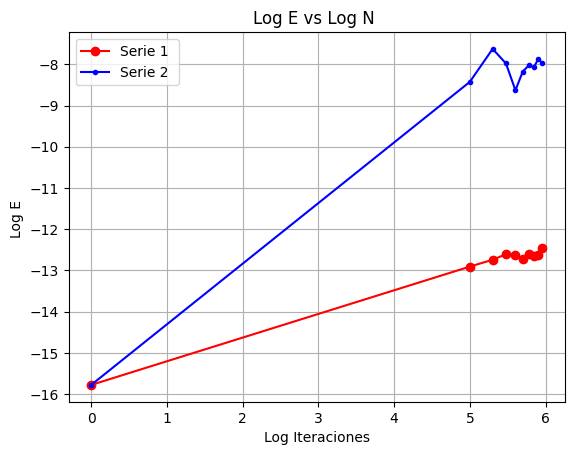

In [ ]:
plt.plot(N_l,E1,"ro-",markersize = "6", label ="Serie 1 ")
plt.plot(N_l,E2,"bo-",markersize = "3" , label ="Serie 2 ")
plt.legend()
plt.xlabel("Log Iteraciones")
plt.ylabel("Log E ")
plt.title("Log E vs Log N ")
plt.grid()
plt.show();

Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 39 del libro del libro



```
# Esto tiene formato de código
```

Sabemos que algunas series convergen si se usan suficientes términos. Si se  desea más precisión en ello , se pueden usar  más iteraciones, pero el asunto no estan sencillo. Ya que a medida
que en el algoritmo se  incluye más términos, aumentan los errores de redondeo.

Hay que poner en balanza dos tipos de errores : los errores de aproximacion o algoritmicos y los errores de redondeo. Los errores de aproximacion son proporcionales al inverso del numero de iteraciones elevado a una potencia. Esto implica que a a mayor numero de iteraciones el error de aproximacion disminuye significativamente.
Mientras que el error de redondeo es proporcional a la raiz cuadrada del numero de iteraciones, por lo que aumenta  suavemente a medida que N se eleva.

Lo expuesto en este parrafo  se cumple en las series 1 y 2. Como se observa en la anterior grafica , el logaritmo del error se eleva a medida que aumenta el logaritmo de las iteraciones. Este ascenso  del error puede deberse a una prevalencia del  aumento  del error de redondeo sobre  la disminucion  del error de aproximacion.

Lo anterior se explica con lo siguiente: Aunque la elevacion del error de redondeo suele ser mas suave que la del error de aproximacion, el numero de iteraciones es muy alto en este caso y puede dar mayor peso al error de redondeo.

Por otra parte, se observa en la grafica que las curvas de las dos series no coinciden . En la serie 2 hay una mayor tendencia al aumento del error que en la serie 1. Esto puede deberse, tal vez, a los efectos provocados por la cancelacion sustractiva